# Characterization of Discrete Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Combination of Systems

The representation of systems with a complex structure as combination of simpler systems is often convenient for their analysis or synthesis. This section discusses three of the most common combinations, the series and parallel connection of systems as well as feedback loops. The latter is very important in control engineering.

### Concatenation

When two linear time-invariant (LTI) systems are combined in series by connecting the output of the first system to the input of a second system this is termed as *concatenation* of two systems. Denoting the impulse responses of the two systems by $h_1[k]$ and $h_2[k]$, the output signal $y[k]$ of the second system is given as

\begin{equation}
y[k] =  x[k] * h_1[k] * h_2[k]
\end{equation}

where $x[k]$ denotes the input signal of the first system. Applying a $z$-transform to the left- and right-hand side, and repeated application of the convolution theorem yields

\begin{equation}
Y(z) = \underbrace{H_1(z) \cdot H_2(z)}_{H(z)} \cdot X(z)
\end{equation}

It can be concluded that the concatenation of two systems can be regarded as one LTI system with the transfer function $H(z) = H_1(z) \cdot H_2(z)$. Hence, the following structures are equivalent

![Concatenation of two systems](concatenation.png)

The extension to a concatenation of $N$ systems is straightforward. The overall transfer function is given by multiplication of all the individual transfer functions $H_n(z)$

\begin{equation}
H(z) = \prod_{n=1}^{N} H_n(z)
\end{equation}

Applications of concatenated systems include for instance the modeling of electroacoustic systems, wireless transmission systems and cascaded filters.

**Example - Concatenation of second-order sections**

Concatenation of LTI systems can be used to construct higher-order filters from lower-order prototypes. Such filters are known as *cascaded filters*. In digital signal processing, typically second-order systems are used as building blocks for higher-order systems. These blocks are termed second-order sections or [biquad filters](https://en.wikipedia.org/wiki/Digital_biquad_filter).

This is illustrated at the before introduced [second-order recursive LTI system](difference_equation.ipynb#Second-Order-System) with transfer function

\begin{equation}
H_0(z) = \frac{\frac{1}{2}}{1 - z^{-1} + \frac{1}{2} z^{-2}}
\end{equation}

Note, the transfer function has been normalized for unit gain at $z = e^{j \Omega} \vert_{\Omega = 0}$.
Concatenation of $N$ second-order filters leads to a filter with order $2 N$. Its transfer function reads

\begin{equation}
H_N(z) = \left(\frac{\frac{1}{2}}{1 - z^{-1} + \frac{1}{2} z^{-2}} \right)^N
\end{equation}

The resulting transfer function is illustrated by its logarithmic magnitude response for a varying number of cascaded filters. First the transfer function $H_N(s)$ is defined

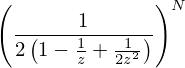

In [1]:
import sympy as sym
sym.init_printing()
%matplotlib inline

z = sym.symbols('z', complex=True)
W = sym.symbols('Omega', real=True)
N = sym.symbols('N', integer=True)

H0 = sym.Rational(1, 2) / (1 - z**(-1) + sym.Rational(1, 2)*z**(-2))
HN = H0**N
HN

The magnitude $|H_N(e^{j \Omega})|$ of the transfer function is shown for $N = \{1, 2, 3\}$ (red, green, blue line)

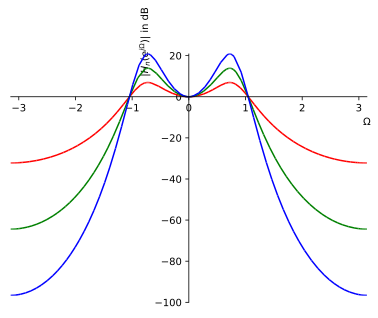

In [2]:
HNa = 20*sym.log(sym.Abs(HN.subs(z, sym.exp(sym.I*W))))

p1 = sym.plot(HNa.subs(N, 1), (W, -sym.pi, sym.pi), xlabel='$\Omega$', ylabel='$| H_n(e^{j \Omega}) |$ in dB', line_color='r', show=False);
p2 = sym.plot(HNa.subs(N, 2), (W, -sym.pi, sym.pi), xlabel='$\Omega$', ylabel='$| H_n(e^{j \Omega}) |$ in dB', line_color='g', show=False);
p3 = sym.plot(HNa.subs(N, 3), (W, -sym.pi, sym.pi), xlabel='$\Omega$', ylabel='$| H_n(e^{j \Omega}) |$ in dB', line_color='b', show=False);
p1.extend(p2)
p1.extend(p3)
p1.show()

**Exercise**

* Compute the magnitude $|H_N(z)|$ and phase $\varphi(z)$ of the concatenated system.
* Using the result from the first exercise, how will the phase of the cascaded filter develop for an increasing number $N$ of cascaded filters?

### Parallel Connection

A structure where two LTI systems share the same input signal and their output signals are superimposed is called *parallel connection*. The overall output signal $y[k]$ is given as the superposition of the output signals of the individual systems

\begin{equation}
y[k] = h_1[k] * x[k] + h_2[k] * x[k]
\end{equation}

Applying a $z$-transform to the left- and right-hand side, exploiting the superposition principle, and convolution theorem yields

\begin{equation}
Y(z) = \underbrace{\left( H_1(z) + H_2(z)  \right)}_{H(z)} \cdot X(z)
\end{equation}

The overall transfer function $H(z)$ of a parallel connection of two systems is given as the superposition of the transfer functions of the individual systems. Hence, the following structures are equivalent

![Parallel connection of two systems](parallel.png)

The extension to a parallel connection of $N$ systems is straightforward. The overall transfer function is given by superposition of all individual transfer functions $H_n(z)$

\begin{equation}
H(z) = \sum_{n=1}^{N} H_n(z)
\end{equation}

A prominent application of a parallel connection of systems are [filter banks](https://en.wikipedia.org/wiki/Filter_bank) as used in signal analysis and many lossy coding schemes.

### Feedback

The connection of two LTI systems, where the input of the second system is connected to the output of the first and the output of the second system is superimposed to the input of the first is called *feedback loop*. This structure is depicted in the following illustration (upper block diagram)

![Two systems combined in a feedback loop](feedback.png)

The output signal $y[k]$ is given as

\begin{equation}
y[k] = x[k] * h_1[k] + y[k] * h_2[k] * h_1[k]
\end{equation}

Applying a $z$-transform to the left- and right-hand side, exploiting the superposition principle and the convolution theorem, and rearrangement of terms yields

\begin{equation}
Y(z) = \frac{H_1(z)}{1 - H_1(z) \cdot H_2(z)} \cdot X(z)
\end{equation}

The overall transfer function $H(z)$ of the feedback loop is then given as 

\begin{equation}
H(z) = \frac{H_1(z)}{1 - H_1(z) \cdot H_2(z)}
\end{equation}

This equivalence is depicted by the lower block diagram of above structure. Applications of feedback loops include [digital control systems](https://en.wikipedia.org/wiki/Control_system).

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.